# <center>Método de Lax</center>

O método de Euler, Equação 4.6, pode ser tornar estável substituindo $u^n_j$ pelo termo médio $\frac{{(u^n_{j+1} + u_{j-1}^n)}}{2}$. O algoritmo resultante é conhecido como método de Lax (Lax, 1954), que foi apresentado anteriormente:

\begin{equation}
\frac{u^{n+1}_{j} - \left(u^n_{j+1} + u^n_{j-1}\right) / 2}{\Delta t}  + c\frac{{\left(u^n_{j+1} - u^n_{j-1}\right)}}{{2\Delta x}} = 0 
\label{eq:4.26}
\tag{4.26}
\end{equation}

Esse esquema explícito de um único passo é de primeira ordem de precisão com erro de truncamento de $O\left[\Delta t, (\Delta x)^2/\Delta t\right]$ e é estável se $|\nu| \leq 1$. A equação modificada é dada por:

\begin{equation}
u_t + c u_x = c\frac{{\Delta x}}{{2}}\left(\frac{{1}}{{\nu}} - \nu\right)u_{xx} + \frac{c (\Delta x)^2}{3}\left(1 - \nu^2\right)u_{xxx} + \cdots
\tag{4.27}
\end{equation}

Observe que esse método não é uniformemente consistente, pois $\frac{{(\Delta x)^2}}{{\Delta t}}$ pode não tender a zero quando $\Delta t$ e $\Delta x$ tendem a zero. No entanto, se $\nu$ for mantido constante à medida que $\Delta t$ e $\Delta x$ se aproximam de zero, o método é consistente. O método de Lax é conhecido por seu grande erro de dissipação quando $\nu \neq 1$. Essa alta dissipação é facilmente perceptível quando comparamos o coeficiente de $u_{xx}$.

Isolando a variável desconhecida em [4.26](#jmx_eqn_eq:4.26) temos

\begin{equation}
\frac{u^{n+1}_{j} - \left(u^n_{j+1} + u^n_{j-1}\right) / 2}{\Delta t}  = - c\frac{{\left(u^n_{j+1} - u^n_{j-1}\right)}}{{2\Delta x}}
\end{equation}

\begin{equation}
u^{n+1}_{j} - \frac{\left(u^n_{j+1} + u^n_{j-1}\right)}{2}  = - c \frac{\Delta t}{2\Delta x} \left(u^n_{j+1} - u^n_{j-1}\right)
\end{equation}

\begin{equation}
u^{n+1}_{j} = \frac{\left(u^n_{j+1} + u^n_{j-1}\right)}{2}  - c \frac{\Delta t}{2\Delta x} \left(u^n_{j+1} - u^n_{j-1}\right)
\end{equation}

tomando $v = c\frac{\Delta t}{\Delta x}$ temos

\begin{equation}
u^{n+1}_{j} = \frac{\left(u^n_{j+1} + u^n_{j-1}\right)}{2}  - \frac{v}{2} \left(u^n_{j+1} - u^n_{j-1}\right)
\end{equation}

# Questão 5 da lista 4. 

Resolva, numericamente, a equação da onda:

\begin{equation}
u_t + u_x = 0, \quad 0 \leq x \leq L
\end{equation}

Submetida à condição inicial:

\begin{equation}
u(x, 0) = \sin\left(\frac{2n\pi x}{L}\right)
\end{equation}

e às **condições de contorno periódicas**, utilizando os seguintes esquemas de diferenças finitas:

1. ~~Upstream~~
2. **Lax**
3. ~~Leap Frog~~
4. ~~Lax-Wendroff~~
5. ~~MacCormack~~
6. ~~Lax-Wendroff de 2 passos~~
7. ~~Upwind de 2ª Ordem~~
8. ~~Trapezoidal (Time Centered Implicit)~~
9. ~~Warming-Kutler-Lomax~~
10. ~~Rusanov ($\omega = 3$)~~
11. ~~Euler Explícito~~

Escolha uma malha com 41 pontos e $\Delta x = 1$ (logo,  $L = 40$) e calcule para  $t = 18.$ Resolva este problema para  $n = 3$ e $\nu = 1$, $\nu = 0.6$ e $\nu = 0.3$ e compare graficamente com a solução exata.


Determine $\beta$  para  $n = 3$ e calcule os erros na amplitude e na fase para o esquema com $\nu = 0.6$.
Compare estes erros com os que aparecem nos gráficos.


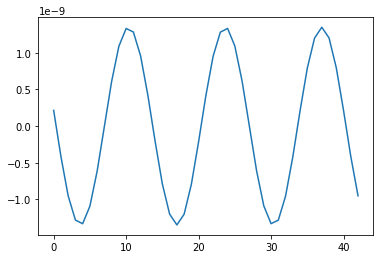

In [8]:
#Método de Lax
 
import numpy as np
import matplotlib.pyplot as plt

l = 40
delta_x = 1
num_pontos = 41
t_final = 18
c = 1
delta_t = 0.1 
n = 3
x = np.arange(0, num_pontos, delta_x)
t = np.arange(0, t_final, delta_t)
num_tempo = len(t)

num_pontos2 = num_pontos + 2

u_num = np.zeros((num_tempo, num_pontos2))

# Definindo as condições iniciais
u_num[0, 1:num_pontos2 - 1] = np.sin((2 * n * np.pi * x) / l)

u_num[0, 0] = u_num[0, num_pontos2 - 3]
u_num[0, num_pontos2 - 1] = u_num[0, 2]

v = (delta_t / delta_x) * c

for i in range(0, num_tempo - 1):
    n = i + 1
    for j in range(1, (num_pontos2 - 1)):
        u_num[i + 1, j] = (u_num[i, j + 1] + u_num[i, j - 1]) / 2 - (v / 2) * (u_num[i, j + 1] - u_num[i, j - 1])
        u_num[n, 0] = u_num[n, num_pontos2 - 3]
        u_num[n, num_pontos2 - 1] = u_num[n, 2]

plt.plot(u_num[-1,:]);